# YOLOPX Baseline
This notebook outlines a baseline with YOLOPX on the BDD dataset, without LightSB or Histogram Transforms. It serves as a baseline to know how the model performs on its own before preprocessing.

## Imports

In [1]:
import os, sys

# if colab, mount drive and get the git repo
if 'google.colab' in sys.modules:
    from google.colab import drive
    print(os.getcwd())
    drive.mount('/content/drive')
    !git clone --recurse-submodules https://github.com/jsluijter02/LightSB_YOLO

    # Append LightSB_YOLO path
    sys.path.append(os.path.join(os.getcwd(), 'LightSB_YOLO'))

    !unzip -q /content/drive/MyDrive/data.zip -d /content/LightSB_YOLO/

# otherwise local path append
else:
    sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
# append the yolo model to path
from scripts.utils import dirs
dirs.add_YOLOPX_to_PATH()

from scripts.models.yolo import YOLOPX_BDD

## Model
Load the model with standard configs, handled in the class

In [3]:
YOLOPX = YOLOPX_BDD()

AUTO_RESUME: False
CUDNN:
  BENCHMARK: True
  DETERMINISTIC: False
  ENABLED: True
DATASET:
  CLAHE_CLIPLIMIT: 2.0
  CLAHE_VAL: False
  COLOR_RGB: False
  DATAROOT: c:\Users\joche\Development\Github\LightSB_YOLO\data\images
  DATASET: BddDataset
  DATA_FORMAT: jpg
  FLIP: True
  HSV_H: 0.015
  HSV_S: 0.7
  HSV_V: 0.4
  LABELROOT: c:\Users\joche\Development\Github\LightSB_YOLO\data\bdd\det_annotations
  LANEROOT: c:\Users\joche\Development\Github\LightSB_YOLO\data\bdd\ll_seg_annotations
  MASKROOT: c:\Users\joche\Development\Github\LightSB_YOLO\data\bdd\da_seg_annotations
  ORG_IMG_SIZE: [720, 1280]
  ROT_FACTOR: 10
  SCALE_FACTOR: 0.25
  SELECT_DATA: False
  SHEAR: 0.0
  TEST_SET: val
  TRAIN_SET: train
  TRANSLATE: 0.1
DEBUG: False
GPUS: (0,)
LOG_DIR: c:\Users\joche\Development\Github\LightSB_YOLO\results\logs
LOSS:
  BOX_GAIN: 0.05
  CLS_GAIN: 0.5
  CLS_POS_WEIGHT: 1.0
  DA_SEG_GAIN: 0.2
  FL_GAMMA: 2.0
  LL_IOU_GAIN: 0.2
  LL_SEG_GAIN: 0.2
  LOSS_NAME: 
  MULTI_HEAD_LAMBDA: None
  O

=> creating c:\Users\joche\Development\Github\LightSB_YOLO\results\logs\BddDataset\logs_2026-02-16-10-25


c:\Users\joche\Development\Github\LightSB_YOLO\scripts\models\yolo.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(self.weights, map_location=se

## Validate Model

In [4]:
YOLOPX.config.defrost()
YOLOPX.set_image_path('images/val')
YOLOPX.config.freeze()

Num validation "night" images: 3929


New image path:  c:\Users\joche\Development\Github\LightSB_YOLO\data\images/val\b1c81faa-3df17267.jpg


  0%|          | 0/983 [00:00<?, ?it/s]c:\Users\joche\anaconda3\envs\yolopx_lightsb\lib\site-packages\torch\functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3610.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 983/983 [06:15<00:00,  2.62it/s]
Test:    Loss(0.000)
Driving area Segment: Acc(0.000)    IOU (0.000)    mIOU(0.000)
Lane line Segment: Acc(0.000)    IOU (0.000)  mIOU(0.000)
Detect: P(0.507)  R(0.835)  mAP@0.5(0.765)  mAP@0.5:0.95(0.422)
Time: inference(0.0694s/frame)  nms(0.0016s/frame)


                 all    3.93e+03     3.7e+04       0.507       0.835       0.765       0.422
Speed: 0.0/0.0/0.0 ms inference/NMS/total per 640x640 image at batch-size 8
Results saved to c:\Users\joche\Development\Github\LightSB_YOLO\results\1_yolopx_real_night\predictions
3900 labels saved to c:\Users\joche\Development\Github\LightSB_YOLO\results\1_yolopx_real_night\predictions\labels
Test:    Loss(0.000)
Driving area Segment: Acc(0.000)    IOU (0.000)    mIOU(0.000)
Lane line Segment: Acc(0.000)    IOU (0.000)  mIOU(0.000)
Detect: P(0.507)  R(0.835)  mAP@0.5(0.765)  mAP@0.5:0.95(0.422)
Time: inference(0.0694s/frame)  nms(0.0016s/frame)


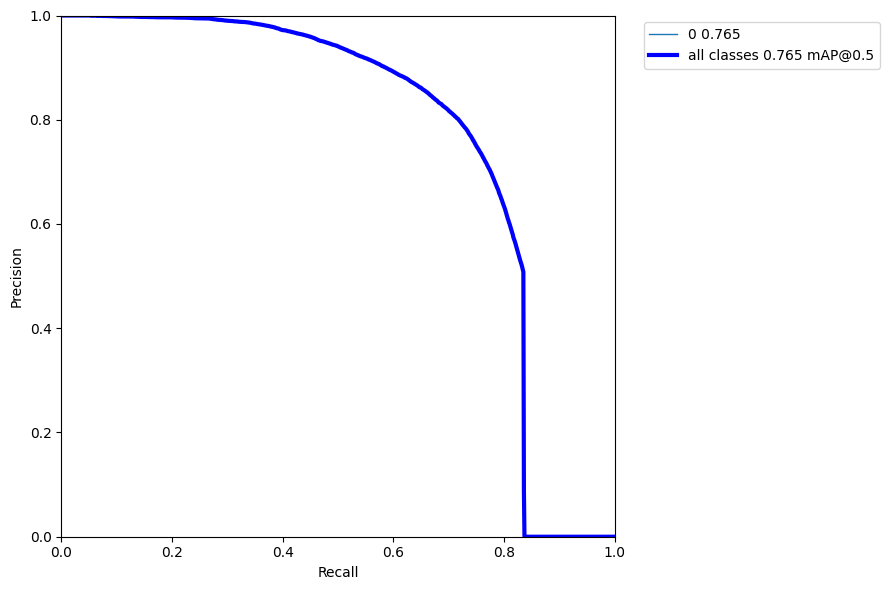

In [5]:
import torch
YOLOPX.config.defrost()
YOLOPX.config.OUTPUT_DIR = os.path.join('results', '1_yolopx_real_night')
YOLOPX.final_output_dir = os.path.join(dirs.get_base_dir(), YOLOPX.config.OUTPUT_DIR)
YOLOPX.config.freeze()
# Base line stats how they perform per split
YOLOPX.validate(timeofday='night')

AUTO_RESUME: False
CUDNN:
  BENCHMARK: True
  DETERMINISTIC: False
  ENABLED: True
DATASET:
  CLAHE_CLIPLIMIT: 2.0
  CLAHE_VAL: False
  COLOR_RGB: False
  DATAROOT: c:\Users\joche\Development\Github\LightSB_YOLO\data\images/val
  DATASET: BddDataset
  DATA_FORMAT: jpg
  FLIP: True
  HSV_H: 0.015
  HSV_S: 0.7
  HSV_V: 0.4
  LABELROOT: c:\Users\joche\Development\Github\LightSB_YOLO\data\bdd\det_annotations
  LANEROOT: c:\Users\joche\Development\Github\LightSB_YOLO\data\bdd\ll_seg_annotations
  MASKROOT: c:\Users\joche\Development\Github\LightSB_YOLO\data\bdd\da_seg_annotations
  ORG_IMG_SIZE: [720, 1280]
  ROT_FACTOR: 10
  SCALE_FACTOR: 0.25
  SELECT_DATA: False
  SHEAR: 0.0
  TEST_SET: val
  TRAIN_SET: train
  TRANSLATE: 0.1
DEBUG: False
GPUS: (0,)
LOG_DIR: c:\Users\joche\Development\Github\LightSB_YOLO\results\logs
LOSS:
  BOX_GAIN: 0.05
  CLS_GAIN: 0.5
  CLS_POS_WEIGHT: 1.0
  DA_SEG_GAIN: 0.2
  FL_GAMMA: 2.0
  LL_IOU_GAIN: 0.2
  LL_SEG_GAIN: 0.2
  LOSS_NAME: 
  MULTI_HEAD_LAMBDA: None

=> creating c:\Users\joche\Development\Github\LightSB_YOLO\results\logs\BddDataset\logs_2026-02-16-10-31


Num validation "daytime" images: 5258
Num validation "daytime" images: 5258


New image path:  c:\Users\joche\Development\Github\LightSB_YOLO\data\images/val\b1c66a42-6f7d68ca.jpg


100%|██████████| 1315/1315 [08:51<00:00,  2.47it/s]
Test:    Loss(0.000)
Driving area Segment: Acc(0.000)    IOU (0.000)    mIOU(0.000)
Lane line Segment: Acc(0.000)    IOU (0.000)  mIOU(0.000)
Detect: P(0.537)  R(0.875)  mAP@0.5(0.833)  mAP@0.5:0.95(0.512)
Time: inference(0.0701s/frame)  nms(0.0016s/frame)
Test:    Loss(0.000)
Driving area Segment: Acc(0.000)    IOU (0.000)    mIOU(0.000)
Lane line Segment: Acc(0.000)    IOU (0.000)  mIOU(0.000)
Detect: P(0.537)  R(0.875)  mAP@0.5(0.833)  mAP@0.5:0.95(0.512)
Time: inference(0.0701s/frame)  nms(0.0016s/frame)


                 all    5.26e+03    6.21e+04       0.537       0.875       0.833       0.512
Speed: 0.0/0.0/0.0 ms inference/NMS/total per 640x640 image at batch-size 8
Results saved to c:\Users\joche\Development\Github\LightSB_YOLO\results\2_yolopx_real_day\predictions
5242 labels saved to c:\Users\joche\Development\Github\LightSB_YOLO\results\2_yolopx_real_day\predictions\labels
Test:    Loss(0.000)
Driving area Segment: Acc(0.000)    IOU (0.000)    mIOU(0.000)
Lane line Segment: Acc(0.000)    IOU (0.000)  mIOU(0.000)
Detect: P(0.537)  R(0.875)  mAP@0.5(0.833)  mAP@0.5:0.95(0.512)
Time: inference(0.0701s/frame)  nms(0.0016s/frame)


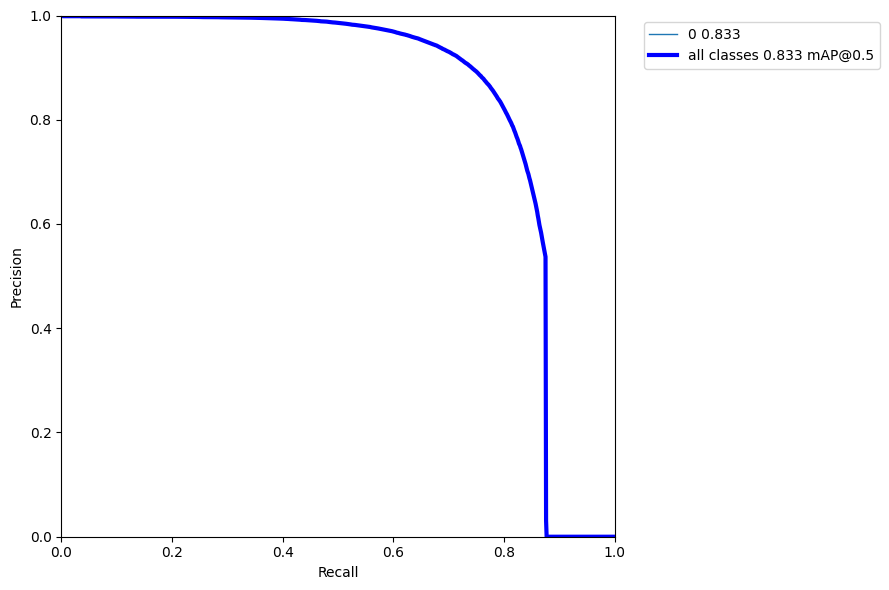

In [6]:
YOLOPX = YOLOPX_BDD()
YOLOPX.config.defrost()
YOLOPX.config.OUTPUT_DIR = os.path.join('results', '2_yolopx_real_day')
YOLOPX.final_output_dir = os.path.join(dirs.get_base_dir(), YOLOPX.config.OUTPUT_DIR)
YOLOPX.config.freeze()
YOLOPX.validate(timeofday='daytime') 